# Collective Investment Funds - An Analysis for Colombia

## Introduction
In this Jupyter Notebook is an analysis of the returns and volatility of the collective investment funds (CIF) registered in the "*Asociación de Fiduciarias de Colombia*" ([AFC](https://www.asofiduciarias.org.co/educacion-financiera/fondos-de-inversion-colectiva/)). This returns will be compared with the option of investing in ETFs that follow indexes such as the [SPY](https://en.wikipedia.org/wiki/SPDR_S%26P_500_Trust_ETF) and the [GXG](https://www.globalxetfs.com/funds/gxg/). 

Because the focus of this analysis is to give an illustration for small individual investors, only the CIF opened for this kind of investors are analyzed. The data is extracted from the AFC (link above), and there will be many different kinds of CIF compared. The main documentation for each type of CIF is found [here](https://sificcolombia.lvaindices.com/frontend/documentos/20200520%20-%20Metodología%20Categorización%20FICs%20Versión%205.0%20(Final)1%20(1).pdf). There you can find a comprehensive description of the portfolio composition of each kind of fund and the description of the risk profile of the investors who decide to invest in them. 

## Objective
For small investors there are many limitations to the kind of portfolios they can access. This could be because of the amount of money needed to construct a diversified portfolio, the lack of financial knowledge and trading expertise, or simply the lack of time to actively manage their portfolio investment. 

Because of the limitations I have faced as a small investor, I decided to look for alternatives in the Colombian financial market. The most obvious options are the low risk-low reward Certificates of Deposit (*a.k.a.* CDs or DTFs), which given the current conditions of low interest rates in the money market are less attractive. Thus, the next option are the CIFs, which let you access more diversified portfolios, composed of corporate or public bonds, a variety of stocks, currencies and derivatives. They are a very good option, considering the low-bar amount required to enter to one, and that you will not be managing the portfolio composition. 

Thus, you will only have to think about which CIF you will put your money. But wait! There are other options that could suit you better: investment in an online broker in which you could put your money on an [ETF](https://www.ft.com/content/f2685757-2639-424f-8f1e-0f4f981dadb9), which also function as a diversified portfolio that you won't have to manage, and that won't come with management fees. So, what you should select? The purpose of this notebook is to help you with this selection process, by answering questions such as:

+ Which types or CIF are currently available for small investors in Colombia?
+ Which are the returns (after fees) of these funds? Moreover, how each categories of CIFs compare with each other?
+ How do they compare with some ETFs?
+ Is volatility a good predictor of returns?

If you are not interested in the Colombian financial market, this notebook is also a guide of how to start your own analysis, focusing on the markets and instruments you like. Hence, this could be a very good material for you.
 

## **_Data Understanding_**
***

In the section below we will dig and analyze the AFC data for this project. You can download the data [here](https://sificcolombia.lvaindices.com/estadisticas/). All the numbers are calculated based on the Colombian Peso (COP). The return is expressed in annual effective rate. Volatility is measured as follows:

+ Monthly volatility: 30 day period
+ Semiannual volatility: 180 day period
+ Annual volatility: 360 day period

For the ETF information I use the [Yahoo Finance API](https://pypi.org/project/yfinance/), which downloads the data from the Yahoo Finance [page](https://finance.yahoo.com). 


First, lets import the libraries required for the analysis:

In [1]:
#------------------------ Libraries----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mlp
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
mlp.style.use('ggplot') # give the style of the plots

### Collective Investment Funds

The next step is to import the data we'll be using in this analysis, which is an Excel file downloaded from the page mentioned above. I make some additions so that Pandas interprets correctly the data types inside the file:

In [35]:
#------------------------Import Data---------------------------
df = pd.read_excel('fic-estadistica-02_01_2017-06_01_2021.xlsx',parse_dates=True,thousands=',',na_values='-')
df.head()

,Fecha corte,Administradora,Categoría,Grupo de Participación,Nombre Participación,Número de Inversionistas,Valor Fondo,Valor Unidad,Rentabilidad Día,Rentabilidad Mes,Rentabilidad Semestral,Rentabilidad Anual,Volatilidad Mes,Volatilidad Semestral,Volatilidad Anual
0,2021-01-05,FIDUCOOMEVA,NaN,PÚBLICO GENERAL,FIC Abierto Avanzar Vista - FIC Avanzar Vista ...,363,1.268208e+10,11219.824790,1.703582,0.956611,2.555779,3.192799,0.0573,0.1643,0.5464
1,2021-01-05,FIDUCOOMEVA,NaN,PÚBLICO GENERAL,FIC Avanzar 180 días - FIC Avanzar 180 días No...,22,3.027570e+09,12098.796265,4.049455,4.911604,6.040934,6.320823,0.0783,0.2656,0.9973
2,2021-01-05,FIDUCOOMEVA,NaN,PÚBLICO GENERAL,FIC Avanzar 365 - FIC Avanzar 365 días Asociad...,611,6.048210e+10,12800.767600,8.514039,8.506260,8.242515,9.188797,0.0134,0.1700,0.3267
3,2021-01-05,FIDUCOOMEVA,NaN,PÚBLICO GENERAL,FIC Avanzar 365 - FIC Avanzar 365 días No Asoc...,381,2.051008e+10,12612.648829,7.459633,7.452953,7.190957,8.275809,0.0134,0.0229,0.0229
4,2021-01-05,FIDUCOOMEVA,NaN,PÚBLICO GENERAL,FIC Avanzar 90 días - FIC Avanzar 90 días No A...,171,1.126956e+10,11402.383195,6.353001,6.261150,5.673596,6.672124,0.0153,0.0172,0.0172


Let's verify the data types are correct (numeric values should be either int or float):

In [36]:
df['Fecha corte'] = pd.to_datetime(df['Fecha corte'])
print(df.dtypes,'\n')
print('Index data type:',df.index.dtype)

Fecha corte                 datetime64[ns]
Administradora                      object
Categoría                           object
Grupo de Participación              object
Nombre Participación                object
Número de Inversionistas             int64
Valor Fondo                        float64
Valor Unidad                       float64
Rentabilidad Día                   float64
Rentabilidad Mes                   float64
Rentabilidad Semestral             float64
Rentabilidad Anual                 float64
Volatilidad Mes                    float64
Volatilidad Semestral              float64
Volatilidad Anual                  float64
dtype: object 

Index data type: int64


Because the column '*Grupo de Participación*' doesn't give information (it was a filter I applied when downloading the dataset, so that the funds analyzed where for the general public), then I remove that column:

In [37]:
df['Grupo de Participación'].value_counts()

PÚBLICO GENERAL     173031
PÚBLICO GENERAL       6544
Name: Grupo de Participación, dtype: int64

In [38]:
df.drop(columns='Grupo de Participación',inplace=True)

Let's change the names of the columns:

In [39]:
df.rename(columns={'Administradora':'Manager','Categoría':'Category','Nombre Participación':'Participation Name','Número de Inversionistas':'Num Investors',
                  'Valor Fondo':'Fund Value','Valor Unidad':'Unit Value','Rentabilidad Día':'Day Return','Rentabilidad Mes':'Month Return','Rentabilidad Semestral':'Semester Return',
                  'Rentabilidad Anual':'Year Return','Volatilidad Mes':'Month Volatility','Volatilidad Semestral':'Semester Volatility','Volatilidad Anual':'Year Volatility',
                  'Fecha corte':'Date'},inplace=True)
df.head()

,Date,Manager,Category,Participation Name,Num Investors,Fund Value,Unit Value,Day Return,Month Return,Semester Return,Year Return,Month Volatility,Semester Volatility,Year Volatility
0,2021-01-05,FIDUCOOMEVA,NaN,FIC Abierto Avanzar Vista - FIC Avanzar Vista ...,363,1.268208e+10,11219.824790,1.703582,0.956611,2.555779,3.192799,0.0573,0.1643,0.5464
1,2021-01-05,FIDUCOOMEVA,NaN,FIC Avanzar 180 días - FIC Avanzar 180 días No...,22,3.027570e+09,12098.796265,4.049455,4.911604,6.040934,6.320823,0.0783,0.2656,0.9973
2,2021-01-05,FIDUCOOMEVA,NaN,FIC Avanzar 365 - FIC Avanzar 365 días Asociad...,611,6.048210e+10,12800.767600,8.514039,8.506260,8.242515,9.188797,0.0134,0.1700,0.3267
3,2021-01-05,FIDUCOOMEVA,NaN,FIC Avanzar 365 - FIC Avanzar 365 días No Asoc...,381,2.051008e+10,12612.648829,7.459633,7.452953,7.190957,8.275809,0.0134,0.0229,0.0229
4,2021-01-05,FIDUCOOMEVA,NaN,FIC Avanzar 90 días - FIC Avanzar 90 días No A...,171,1.126956e+10,11402.383195,6.353001,6.261150,5.673596,6.672124,0.0153,0.0172,0.0172


Column explanation:
+ Manager: the fund's manager enterprise
+ Category: the classification category according to the AFC's nomenclature (more information about this in the documentation described above)
+ Participation name: name of the individual CIF
+ Num Investors: number of investors currently in the fund

I set the earliest date found in the dataset as the starting point and the end of 2020 as the ending point:

In [40]:
print('Starting date:',df['Date'].min())
print('Ending date:',df[df['Date']<'2021']['Date'].max())

Starting date: 2017-01-02 00:00:00
Ending date: 2020-12-31 00:00:00


In [41]:
df = df[df.Date<'2021']

I find the proportion of missing values in the columns:

In [42]:
df.isnull().mean().sort_values(ascending=False)

Category               0.370940
Year Volatility        0.207604
Manager                0.188229
Semester Volatility    0.081384
Month Volatility       0.018985
Fund Value             0.002550
Unit Value             0.002544
Day Return             0.000089
Year Return            0.000017
Month Return           0.000017
Semester Return        0.000000
Num Investors          0.000000
Participation Name     0.000000
Date                   0.000000
dtype: float64

As you can see there are many missing values both in the variable "Category", "Year Volatility" and "Manager". I'll try to fix this problem using the information of "Manager" and "Participation Name". Some of the values missing for the month, semester and year volatility could be explained because of the youth of the fund (it could be so young that it doesn't have yet this data). 

Lets see first if there is any row who have all the columns associated with returns empty:

In [43]:
print('Number of rows before elimination:',df.shape[0])
df = df.dropna(subset=['Day Return','Month Return','Semester Return','Year Return','Month Volatility','Semester Volatility','Year Volatility'],how='all')
print('Number of rows after elimination:',df.shape[0])

Number of rows before elimination: 179250
Number of rows after elimination: 179250


There is no row where this happens. Lets now see the amount of classes for each categorical variable:

In [44]:
for column in df.columns[1:4]:
    print('The {} variable has {} unique values'.format(column,len(df[column].unique())))

The Manager variable has 26 unique values
The Category variable has 23 unique values
The Participation Name variable has 200 unique values


Because the information about the fund is contained in the "Category" variable (that is described in the documentation linked above), I'll will eliminate all the funds that have no "Category". If the fund presents missing values (*i.e.* in some dates it has "Category" but in others not), I'll fill them with the values assigned that other date that contains the category information. But first, let's see some information about these categorical variables:

In [45]:
fun1 = lambda col: len(col.unique())
fun2 = lambda col: list(col.unique())
cat_part = pd.DataFrame(df[df['Category'].notnull()].groupby('Participation Name')['Category'].agg([fun1,fun2])).rename(columns={'<lambda_0>':'Num Categories','<lambda_1>':'Categories'})
fundsWithCat = cat_part.index
print('Number of funds without any Category information:',len(df['Participation Name'].unique())-len(cat_part.index))
print('Number of funds with more than one category:',len(cat_part[cat_part['Num Categories']>1].index),'\n')
print('FUNDS WITH MORE THAN ONE CATEGORY: \n')
for pn in cat_part[cat_part['Num Categories']>1].index:
    print(pn,'\n',cat_part.loc[pn,'Categories'],'\n')

Number of funds without any Category information: 27
Number of funds with more than one category: 13 

FUNDS WITH MORE THAN ONE CATEGORY: 

Alta Liquidez - Única 
 ['Otros Fondos', 'Fondo de Renta Fija Pesos de Liquidez'] 

BBVA ESTRATEGIA BALANCEADO GLOBAL - Única 
 ['Fondo Balanceado Mayor Riesgo', 'Fondo Balanceado Mayor Riesgo Global'] 

CUBRIR BALANCEADO INTERNACIONAL - De 4 a 80 SMMLV 
 ['Fondo Balanceado Moderado', 'Fondo Balanceado Menor Riesgo', 'Fondo Balanceado Menor Riesgo Global'] 

ES+ - Principal 
 ['Fondo Balanceado Menor Riesgo', 'Fondo Balanceado Menor Riesgo Local'] 

Estrategia Moderada - Única 
 ['Fondo Balanceado Menor Riesgo', 'Fondo Balanceado Menor Riesgo Local'] 

FIC ACCIVAL BALANCEADO - Única 
 ['Fondo Balanceado Moderado', 'Fondo Balanceado Moderado Local'] 

FIC Avanzar Solidario - FIC Avanzar Solidario No Asociado a Coomeva 1 
 ['Fondo de Renta Fija Pesos de Liquidez', 'Fondo de Renta Fija Pesos de Corto Plazo'] 

FIC SEGURIDAD - Única 
 ['Fondo Balancead

In [46]:
man_part = pd.DataFrame(df[df['Manager'].notnull()].groupby('Participation Name')['Manager'].apply(fun1))
print('Number of funds without any Manager information:',len(df['Participation Name'].unique())-len(man_part.index))
print('Number of funds with more than one category:',len(man_part[man_part['Manager']>1]))

Number of funds without any Manager information: 59
Number of funds with more than one category: 0


Because some funds (individualized by the variable "Participation Name") have information of either 'Manger' or 'Category' in other moments of time, I'll fill the "Manager" and "Category" with the values associated with that "Participation Name" but for another period of time. In the cases where there is more than one "Category" per fund, I'll fill missing values with the next observed value for that fund (in case this doen't work because the missing values are at the end, I'll do the same forwards). To do this correctly I'll sort the dataframe by 'Participation Name' and 'Date' (in that order). But first, I'll filter out the funds without any 'Category'; information:

In [47]:
df = df[df['Participation Name'].isin(fundsWithCat)]

In [48]:
print('Proportion missing values per column after filter:')
df.isnull().mean().sort_values(ascending=False)

Proportion missing values per column after filter:


Category               0.344577
Year Volatility        0.181626
Manager                0.170112
Semester Volatility    0.067688
Month Volatility       0.015729
Fund Value             0.002656
Unit Value             0.002651
Day Return             0.000093
Year Return            0.000017
Month Return           0.000012
Semester Return        0.000000
Num Investors          0.000000
Participation Name     0.000000
Date                   0.000000
dtype: float64

In [49]:
df = df.sort_values(['Participation Name','Date']).reset_index(drop=True)
print('Funds analized:',len(df['Participation Name'].unique()))

Funds analized: 173


In [50]:
#-------------------- Fill Missing Values--------------------
def fillMissing(col):
    '''
    This function fills missing values in a column by making a backwards fill first 
    followed by a forward fill
    '''
    if col.fillna(method='bfill').isnull().mean()>0:
        col = col.fillna(method='bfill')
        return col.fillna(method='ffill')
    else:
        return col.fillna(method='bfill')
part_unique = df['Participation Name'].unique()

# Replacing the missing values according to the rule:
for part in part_unique:
    temp = df[df['Participation Name']==part][['Manager','Category']].apply(fillMissing)
    indexes = temp.index
    df.loc[indexes,['Manager','Category']] = temp.loc[indexes,['Manager','Category']]
print('Proportion of missing values per Column:')
df.isnull().mean().sort_values(ascending=False)

Proportion of missing values per Column:


Year Volatility        0.181626
Manager                0.170112
Semester Volatility    0.067688
Month Volatility       0.015729
Fund Value             0.002656
Unit Value             0.002651
Day Return             0.000093
Year Return            0.000017
Month Return           0.000012
Semester Return        0.000000
Num Investors          0.000000
Participation Name     0.000000
Category               0.000000
Date                   0.000000
dtype: float64

As you can see, the 'Category' missing values drop to 0% (as expected, because all funds without 'Category' information were dropped). On the other hand there wasn't a reduction in the 'Manager' variable, meaning that there wasn't cases where a fund has information about the manager in a period but doesn't in another. 

***
Now that we have the data that we wanted to work with for the CIF, it's time to make some comparisons among the funds. I'll work with the year returns of the funds. First lets see how the categories compare with reach other:

In [51]:
df.groupby(['Category'])[['Year Return','Year Volatility']].mean().sort_values('Year Return',ascending=False)

,Year Return,Year Volatility
Category,,
Fondo Accionario Internacional,6.943588,41.018829
Fondo de Renta Fija Pesos de Largo Plazo,6.469022,2.742877
Fondo de Renta Fija Internacional,6.101460,14.461234
Fondo de Activo de Crédito,5.866222,0.229121
Fondo Inmobiliario de Renta Nacional,5.427082,1.282215
Fondo de Renta Fija Pesos de Mediano Plazo,5.350614,1.031272
Fondo Balanceado Menor Riesgo Global,5.134859,6.999094
Otros Fondos,5.131047,8.852909
Fondo Balanceado Menor Riesgo Local,4.708756,1.865380


As you can see above, there is not a big difference between the average year returns between the different categories of CIFs, but there is indeed a big difference in relation with the average volatility that each fund handles. For each individual investor the objective should be to find a fund that offers the highest return given the risk that the investor is willing to accept (according to his/her risk profile). 

Now, let's see the fund manager results:

In [52]:
df[df['Manager'].notnull()].groupby('Manager')[['Year Return','Year Volatility']].mean().sort_values('Year Return',ascending=False)

,Year Return,Year Volatility
Manager,,
BTG PACTUAL S.A.,6.887571,10.961890
OLD MUTUAL SOCIEDAD FIDUCIARIA S.A.,5.509552,1.150882
VALORES BANCOLOMBIA S.A.,5.396076,25.363337
FIDUCIARIA BOGOTA S.A.,4.843919,11.884370
FIDUCIARIA BANCOLOMBIA S.A.,4.826793,14.415922
FIDUCOLDEX S.A.,4.711920,0.857659
CREDICORP CAPITAL S.A.,4.666672,16.295994
BBVA FIDUCIARIA S.A.,4.353465,16.111818
FIDUCIARIA POPULAR S.A.,4.194884,0.489566


As seen above, when grouped by manager the returns seem to have a similar return interval compared when they were grouped by category, but a very smaller variability with respect to volatility. This could be explained because of the combination of the different risk profile CIFs, that when avergaed produce a less volatile result. 

Now lets see the historical behavior of the best performing CIF category, measured by the year return, both interms of return and volatility:

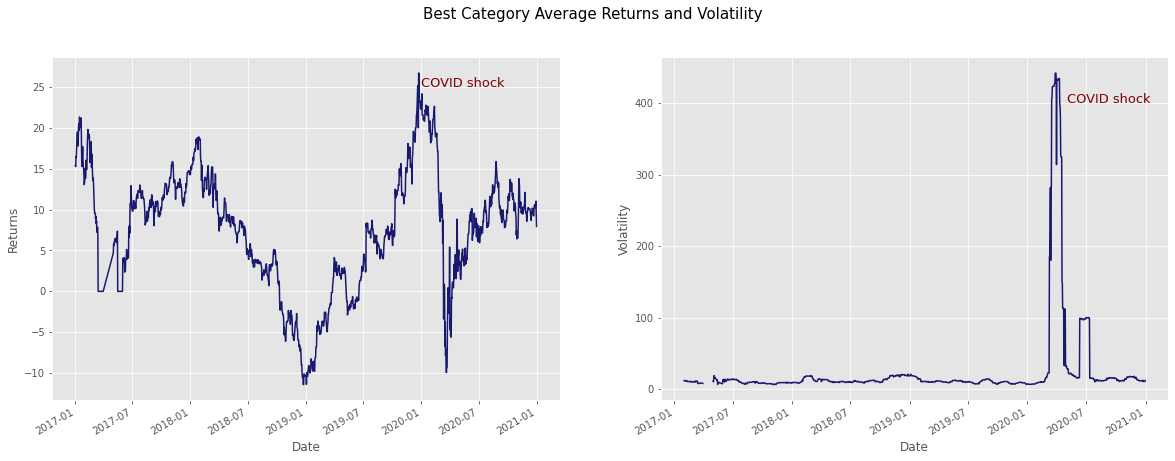

In [54]:
def createAxes(numAxes,fig,shape):
    '''
    Creates a dictionary with axes for a plot
    numAxes: number of subplots
    fig: figure where that subplots are added
    shape: tuple with the organization of the subplots. The first number is 
           the number of columns, second number of rows
    '''
    rows,cols = shape
    assert rows*cols==numAxes, "The shape doesn't correspond with the number of subplots"
    axes = {'ax'+str(i): fig.add_subplot(rows,cols,i+1) for i in range(numAxes)}
    return axes
best_category = df[df['Category']=='Fondo Accionario Internacional'].groupby('Date')[['Year Return','Month Volatility']].mean().reset_index().set_index('Date')
fig = plt.figure()
axes = createAxes(2,fig,(1,2))
best_category['Year Return'].plot(ax=axes['ax0'],figsize=(20,7),color='midnightblue')
axes['ax0'].set_ylabel('Returns')
best_category['Month Volatility'].plot(ax=axes['ax1'],figsize=(20,7),color='midnightblue')
axes['ax1'].set_ylabel('Volatility')
plt.suptitle('Best Category Average Returns and Volatility',fontsize=15)
axes['ax0'].annotate('COVID shock',xy=('2020-01-01',25),color='maroon',fontsize=13)
axes['ax1'].annotate('COVID shock',xy=('2020-05-01',400),color='maroon',fontsize=13)
plt.savefig('i/graph1.png',format='png',dpi=300)
plt.show()

As seen above the returns of the funds tend to be very volatile and susceptible to all kinds of shocks. For example, as seen in the graph above, the COVID-19 shock had a huge impact (as seen in the sharp increase in the volatility and the decline of the returns). This is an important thing to have in mind, especially when the economy or financial markets turn turbulent. In these cases, you could consider to rebalance you inversion with sovereign fixed income or CDs. 

Let's see which are the best funds per category according to the 'Year Return':

In [21]:
pfunds = df.groupby(['Category','Participation Name'])[['Year Return','Year Volatility']].mean().sort_values('Year Return',ascending=False).reset_index()
index = list(pfunds.groupby('Category')['Year Return'].idxmax())
pfunds.loc[index,:].sort_values('Year Return',ascending=False)

,Category,Participation Name,Year Return,Year Volatility
0,Otros Fondos Accionarios,"""SERFINCO AIC ECOPETROL"" - Única",33.625258,164.823084
1,Fondo Balanceado Menor Riesgo,CUBRIR BALANCEADO INTERNACIONAL - De 4 a 80 SMMLV,14.504050,8.101224
2,Fondo Balanceado Moderado,CUBRIR BALANCEADO INTERNACIONAL - De 4 a 80 SMMLV,12.508456,9.489624
3,Fondo Accionario Internacional,Acciones Internacionales - Clase A,10.042728,11.839941
5,Otros Fondos,Renta Sostenible Global - Única,9.973961,8.871839
8,Fondo de Activo de Crédito,Diversificado II - Clase A,9.448698,0.070613
12,Fondo de Renta Fija Pesos de Largo Plazo,Deuda Pública - Clase A,8.334844,2.733633
13,Fondo de Renta Fija Internacional,ALIANZA RENTA FIJA MERCADOS EMERGENTES - Tipo A,8.321407,44.298244
15,Fondo Inmobiliario de Renta Nacional,FONDO DE INVERSION COLECTIVA INMOBILIARIO INMO...,7.763224,0.896477
19,Fondo de Alto Rendimiento Nacional,Renta Fija Plus - Única,7.096056,2.128404


An important thing to note about the table above is that some funds present very high average returns. However, this must be taken carefully, because the time span of the analysis is very short, and usually this kind of returns is not consistent. However, it serves as an illustration of the variability that can be seen among the different funds. An important thing to consider in this part is that investors should expect higher returns for more risk on the long term. Thus, for longer series the conclusions about the returns could be more conclusive. Another important thing is to read how the portfolios are balanced, because the different categories of portfolios in this analysis are focused on different risk profiles.

Now let's see if there is a clear relationship between volatility (that is used as a measure of risk) and return. As seen below, a relationship between these two variables is not very clear, as one could expect. This may be because volatility is not a good enough measure of risk (even though it is widely used as such).

 

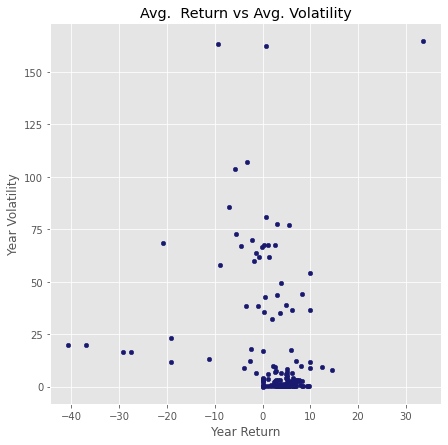

In [24]:
pfunds.plot(x='Year Return',y='Year Volatility',kind='scatter',
            color='midnightblue',figsize=(7,7),title='Avg.  Return vs Avg. Volatility',
           fontsize=10)
plt.show()

From this point on I'll use the average results grouped by date and for category of CIF. This is to ease the comparison process with the ETFs, and give a more realistic perspective about the performance of the funds (as discused above, some funds present very high returns, but generally this is not a consistent result, thus, averaging by category can give a better perspective).

To avoid errors when comparing with the ETFs, I'll calculate the daily return (remember the the 'Day Return' variable is an annual effective rate, not a daily rate) with the day-to-day unit value variation. This means that all instances without unit value are eliminated, and then the daily returns are calculated for each category of fund:

In [25]:
# Eliminate missing values for the 'Unit Value' variable:
df = df[df['Unit Value'].notnull()]
df.isnull().mean().sort_values(ascending=False)

Year Volatility        0.179451
Manager                0.170564
Semester Volatility    0.065665
Month Volatility       0.015264
Day Return             0.000093
Year Return            0.000017
Month Return           0.000012
Fund Value             0.000006
Semester Return        0.000000
Unit Value             0.000000
Num Investors          0.000000
Participation Name     0.000000
Category               0.000000
Date                   0.000000
dtype: float64

In [26]:
# Calculating the daily returns using the Unit Value daily change
def prepMultiData(df,groupVars,numVar):
    '''
    df: dataframe that contains groupVars and numVar
    groupVars: list variables used to group data, the first being a data variable and the second a categorical variable
    numVar: string with the name of variable used to be the numerical information used
    
    Returns: pivot table where the columns are the categories of the categorical variable
             and its index the dates
    '''
    g = df.groupby(groupVars)[numVar].mean().reset_index()
    p = g.pivot(index=groupVars[0],columns=groupVars[1],values=numVar)
    return p 
val_cat = prepMultiData(df,['Date','Category'],'Unit Value')
ret_cat = val_cat.pct_change()
ret_cat.head()

Category,Fondo Accionario Internacional,Fondo Accionario Nacional,Fondo Balanceado Mayor Riesgo,Fondo Balanceado Mayor Riesgo Global,Fondo Balanceado Mayor Riesgo Local,Fondo Balanceado Menor Riesgo,Fondo Balanceado Menor Riesgo Global,Fondo Balanceado Menor Riesgo Local,Fondo Balanceado Moderado,Fondo Balanceado Moderado Local,...,Fondo de Activo de Crédito,Fondo de Alto Rendimiento Nacional,Fondo de Renta Fija Internacional,Fondo de Renta Fija Nacional para Entidades Públicas,Fondo de Renta Fija Pesos de Corto Plazo,Fondo de Renta Fija Pesos de Largo Plazo,Fondo de Renta Fija Pesos de Liquidez,Fondo de Renta Fija Pesos de Mediano Plazo,Otros Fondos,Otros Fondos Accionarios
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.003582,0.006621,NaN,NaN,0.003806,NaN,NaN,0.000401,NaN,0.000902,...,0.000306,0.000186,0.000227,0.000205,0.000094,-0.000374,0.000195,0.000077,0.000354,0.001401
2017-01-04,0.010044,0.010708,NaN,NaN,0.009074,NaN,NaN,0.000958,NaN,0.003004,...,0.000307,0.000199,0.000858,0.000210,0.000190,0.001401,0.000189,0.000343,-0.000058,0.019328
2017-01-05,0.004202,0.002679,NaN,NaN,0.004111,NaN,NaN,0.001119,NaN,0.002724,...,0.000306,0.000201,0.001170,0.000187,0.000312,0.002535,0.000243,0.000663,0.000702,0.004105
2017-01-06,-0.003647,-0.001802,NaN,NaN,-0.000090,NaN,NaN,0.000339,NaN,0.000279,...,0.000300,0.000395,0.001491,0.000354,0.000344,0.002675,0.000356,0.000623,-0.000346,-0.003618


### ETFs
Now we'll analyze the performance of the selected indexes. First, let's bring the data and take a first look:

In [27]:
etfsTickers = yf.Tickers('SPY GXG')
etfDF = pd.DataFrame(etfsTickers.history(period='5y'))
etfDF.head()

[*********************100%***********************]  2 of 2 completed


Close             Dividends            High              \
                  GXG         SPY       GXG  SPY        GXG         SPY   
Date                                                                      
2016-01-11  24.255072  174.423950       0.0  0.0  24.675679  175.604272   
2016-01-12  23.869513  175.831238       0.0  0.0  25.131337  176.639302   
2016-01-13  24.465374  171.445892       0.0  0.0  24.885982  176.920756   
2016-01-14  24.956087  174.260468       0.0  0.0  24.956087  175.468026   
2016-01-15  23.974667  170.519791       0.0  0.0  24.184970  171.382329   

                  Low                   Open             Stock Splits      \
                  GXG         SPY        GXG         SPY          GXG SPY   
Date                                                                        
2016-01-11  24.149919  172.344779  24.640630  175.241089          0.0   0   
2016-01-12  23.729310  173.543231  24.430323  175.976511          0.0   0   
2016-01-13  24.325171  171.037323  24.325171  176.548498          0.0   0   
2016-01-14  24.290124  170.383584  24.430327  172.099585          0.0   0   
2016-01-15  23.729311  168.440619  24.184970  169.575541          0.0   0   

           Volume             
              GXG        SPY  
Date                          
2016-01-11  18100  187941300  
2016-01-12  21800  172330500  
2016-01-13  27700  221168900  
2016-01-14  37500  240795600  
2016-01-15  35900  324846400

There are no missing values for any of the variables, as seen below:

In [28]:
print('Proportion of Missing Values per Column \n')
etfDF.isnull().mean()

Proportion of Missing Values per Column 



Close         GXG    0.0
              SPY    0.0
Dividends     GXG    0.0
              SPY    0.0
High          GXG    0.0
              SPY    0.0
Low           GXG    0.0
              SPY    0.0
Open          GXG    0.0
              SPY    0.0
Stock Splits  GXG    0.0
              SPY    0.0
Volume        GXG    0.0
              SPY    0.0
dtype: float64

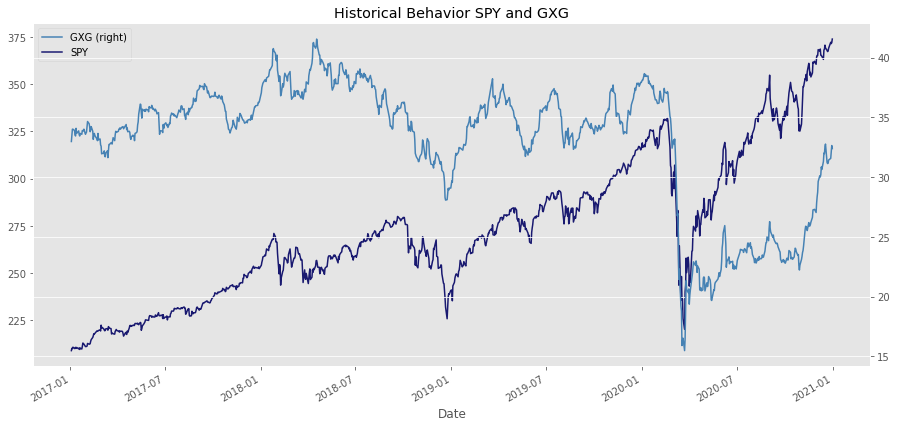

In [29]:
# Select only the close values of the indexes:
df_etf = pd.DataFrame(index=etfDF.index)
df_etf['GXG'] = etfDF[('Close','GXG')]
df_etf['SPY'] = etfDF[('Close','SPY')]
df_etf = df_etf[(df_etf.index>='2017-01-01') & (df_etf.index<'2021-01-01')] # limiting the periods analyzed 
t = 'Historical Behavior SPY and GXG'
df_etf.plot(secondary_y='GXG',color=('steelblue','midnightblue'),figsize=(15,7),
           title=t)
plt.show()

As seen in the graph above, the ETFs are subject to the same kind of economic and financial shocks as the CIFs, presenting a high variability in their values. Now let's calculate and compare the returns of the ETFs:

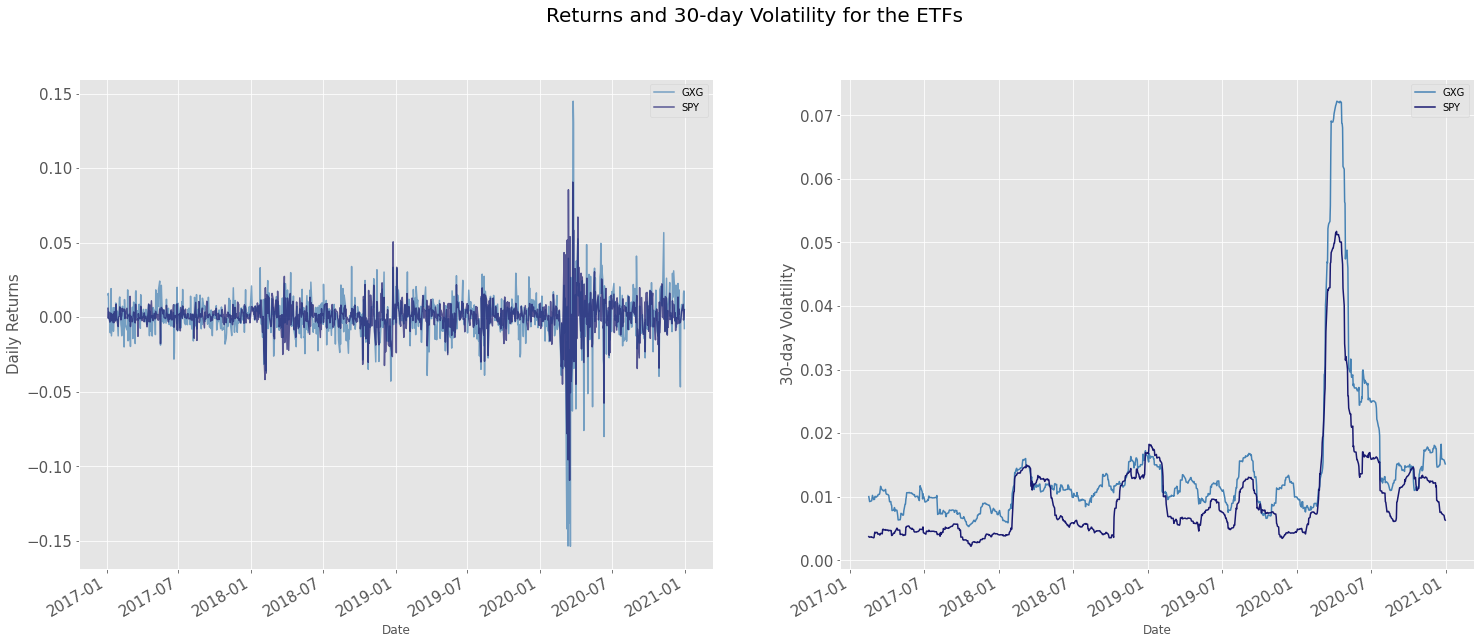

In [61]:
etf_returns = df_etf.pct_change()
fig = plt.figure()
axes = createAxes(2,fig,(1,2))
etf_returns.plot(figsize=(20,5),color=['steelblue','midnightblue'],
                 ax=axes['ax0'],alpha=0.7,fontsize=15)
etf_returns.rolling(window=30).std().plot(color=['steelblue','midnightblue'],
                                         ax=axes['ax1'],figsize=(25,10),fontsize=15)
plt.suptitle('Returns and 30-day Volatility for the ETFs',fontsize=20)
axes['ax0'].set_ylabel('Daily Returns',fontsize=15)
axes['ax1'].set_ylabel('30-day Volatility',fontsize=15)
plt.show()

Once agrain we can see the huge impact that the COVID-19 pandemic had over these ETFs, showing the dramatic increase in the volatility of the returns.

### Comparison
The next step in the exercise is to compare the different CIF and ETFs. This comparison process will be done with the daily average category returns and the ETFs' daily returns. With this information I'll calculate the Return on Risk ratio, and ordered the results:

$$RoR=\frac{\text{Annualized Return}}{\text{Annualized Volatility}}\tag{Return on Risk}$$

To annualize the volatility (measured  by the standard deviation of the returns), I'll use:
$$\sigma_{annualized}= \sigma_d\sqrt{d}$$

where $d$ is the averge number of days per year for each investment option.

In [31]:
def returnOnRisk(df,d):
    '''
    df: dataframe with the data of returns
    d: number of days per year for the dataset
    Returns: the annualized return over annualized volatiltity ratio
    '''
    def anVar(col):
        '''Compounds the returns'''
        return (col+1).prod()**(d/df[col.name].notnull().sum())-1
    return df.apply(anVar)/(df.std()*np.sqrt(d))

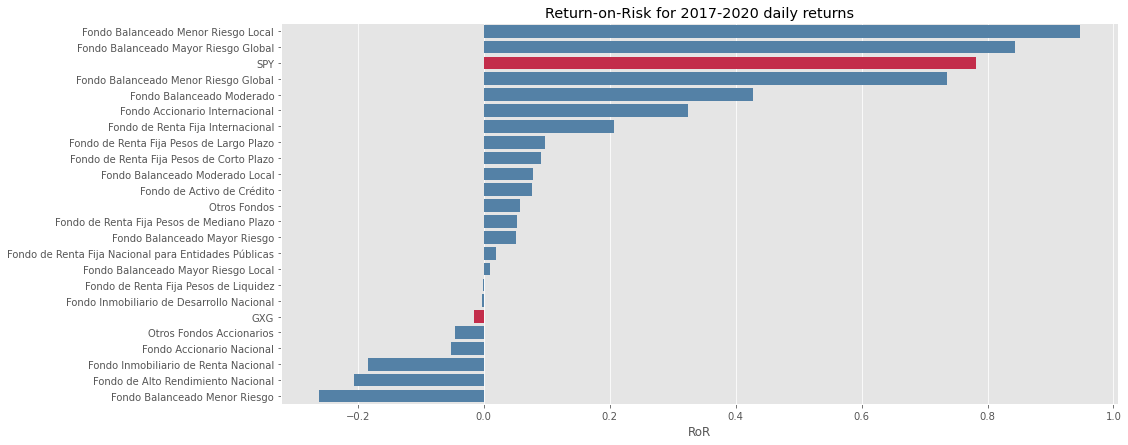

In [62]:
return_risk_cif = returnOnRisk(ret_cat,365) # CIF return-on-risk ratio
return_risk_etf = returnOnRisk(etf_returns,252) # ETF return-on-risk ratio
return_on_risk = pd.DataFrame(pd.concat([return_risk_cif,return_risk_etf])).rename(columns={0:'RoR'}).sort_values('RoR',ascending=False)
colors = ['steelblue' if i not in (2,18) else 'crimson' for i in range(return_on_risk.shape[0])]
plt.figure(figsize=(15,7))
plt.title('Return-on-Risk for 2017-2020 daily returns')
sns.barplot(y=return_on_risk.index,x=return_on_risk['RoR'],
            palette= colors,orient='h')
plt.savefig('i/comp.png',format='png',dpi=1080)
plt.show()

As seen in the graph above, there is not a significant difference in the period 2017-2020 in relation to the RoR between the ETFs and the CIFs. Neither ETF shows an outstanding result in comparison with the different categories of CIF. Again, I remind you that the analysis period is very short, thus the analysis has to be taken with a grain of salt. Another thing to consider in this case is that the datasets present different amount of days per year (CIF dataset have 365 and ETF dataset has only 252 on average). 

### Returns and Volatility
Finally I'll answer the question: is volatility a good predictor of returns? For this I'll use the CIF dataframe,in particular the 'Month Return' and 'Month Volatility' to make a linear regression and find the predictive capability of the volatility over the returns.

In [33]:
# Data preparation 
df_f = df.dropna(subset=['Month Return','Month Volatility'],how='any') # drop NAs
X = df_f['Month Volatility'] # Select Variables X
y = df_f['Month Return'] 
x1_train,x1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.3)
x1_train = np.array(x1_train).reshape(-1,1)
x1_test = np.array(x1_test).reshape(-1,1)

In [34]:
# Linear model:
lr_model = LinearRegression(normalize=True)
lr_model.fit(x1_train,y1_train) # fitting the training data 
y_hat = lr_model.predict(x1_test) # predicting the training data
rss = r2_score(y1_test,y_hat) # estimating the evaluation score
rssTrain = r2_score(y1_train,lr_model.predict(x1_train))
print('The R-squared of the linear model is {}, with a training sample of {} \
        instances and with a training R-squared of  {}'.format(round(rss,4),
                                                            x1_train.shape[0],
                                                           round(rssTrain,4)))

The R-squared of the linear model is 0.0106, with a training sample of 118274         instances and with a training R-squared of  0.0097


As seen by the $R^2$ of the model, there seems to be a very weak relationship between volatility and returns. This happends for both test and train scores. This result reinforces what we saw above, were it seems as if volatility is not a good measure of risk. 

Thus, for making a good analisys about risk and return you should broaden your perspective. The behavior of the returns of a  financial asset is a very complex phenomena, that has been studied for more than a hundred years and is still a very contentious issue. This is because it is subject to all kinds of interactions, from economic and financial fundamentals, to herd behaviour in the market, and to random events. 

But what should be always kept in mind is that you should seek the maximum return for the amount of risk you are willing to take (or what is the same, minimize the risk for a level of long term returns you want). 